### IS727272 - Cordero Hernández, Marco Ricardo

# Evaluación de Regresión Lineal

Fred is a very predictable man. For instance, when he uses his laptop, all he does is watch TV shows. He keeps on watching TV shows until his battery dies. Also, he is a very meticulous man, i.e. he pays great attention to minute details. He has been keeping logs of every time he charged his laptop, which includes how long he charged his laptop for and after that how long was he able to watch the TV. Now, Fred wants to use this log to predict how long will he be able to watch TV for when he starts so that he can plan his activities after watching his TV shows accordingly.

Challenge

You are given access to Fred’s laptop charging log by reading from the file “trainingdata.csv”. The training data file will consist of 100 lines, each with 2 comma-separated numbers.

The first number denotes the amount of time the laptop was charged.
The second number denotes the amount of time the battery lasted.

Sample Input

1.50

Sample Output

3.00

Scoring

Use the MSE score and R2 score. Compare these numbers and conclude how efficient is your model (W).

NOTE: Do not use the regression library from sklearn. Use the Gradient Descent algorithm, you can add polinomials grades.

* This problem was obtained from hackerrank: https://www.hackerrank.com/challenges/battery/problem?isFullScreen=true

In [1]:
# Import libraries
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# 1. Read the data
def load_csv(filename):
    ds = pd.read_csv(filename, header = None)
    x = np.array(ds[0])
    y = np.array(ds[1])
    x = np.reshape(x, (len(x), 1))
    y = np.reshape(y, (len(y), 1))
    
    return x, y

x, y = load_csv('./Datasets/01 - trainingdata.csv')
print(f'X size: {np.shape(x)}  Y size: {np.shape(y)}')

X size: (100, 1)  Y size: (100, 1)


In [3]:
def display(data): # For better result displaying
    print(data[:20])

In [4]:
# 2. Normalize
def normalize(x):
    return (x - np.mean(x, axis = 0)) / (np.ndarray.std(x, axis = 0))

X_norm = normalize(x)

print(np.shape(X_norm))
display(X_norm[:20])

(100, 1)
[[-0.6354013 ]
 [ 0.92517024]
 [-0.66783812]
 [-0.25336762]
 [-0.96337361]
 [ 1.17024845]
 [ 0.88192115]
 [ 0.33409927]
 [ 1.6495926 ]
 [ 0.10704151]
 [ 1.26395483]
 [ 0.362932  ]
 [ 1.64238441]
 [-1.59769368]
 [-0.9273327 ]
 [ 0.32328699]
 [-1.35982365]
 [-0.07316305]
 [ 0.26562153]
 [-1.64815096]]


In [5]:
# 3. Add ones
def add_ones(X):
    ones = np.ones((len(X), 1))
    X1 = np.concatenate((ones, X), axis = 1)

    return X1

x = add_ones(X_norm)
print(np.shape(x))
display(x)

(100, 2)
[[ 1.         -0.6354013 ]
 [ 1.          0.92517024]
 [ 1.         -0.66783812]
 [ 1.         -0.25336762]
 [ 1.         -0.96337361]
 [ 1.          1.17024845]
 [ 1.          0.88192115]
 [ 1.          0.33409927]
 [ 1.          1.6495926 ]
 [ 1.          0.10704151]
 [ 1.          1.26395483]
 [ 1.          0.362932  ]
 [ 1.          1.64238441]
 [ 1.         -1.59769368]
 [ 1.         -0.9273327 ]
 [ 1.          0.32328699]
 [ 1.         -1.35982365]
 [ 1.         -0.07316305]
 [ 1.          0.26562153]
 [ 1.         -1.64815096]]


In [6]:
# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)
print('Shape of Training data: ', np.shape(X_train), np.shape(y_train))
print('Shape of Testing data: ', np.shape(X_test), np.shape(y_test))

Shape of Training data:  (67, 2) (67, 1)
Shape of Testing data:  (33, 2) (33, 1)


In [7]:
# 5.1 Cost Function GD
def mse(Y, Yt):
    residual = Y - Yt
    cost = np.dot(residual.T, residual) / len(Y)
    return cost

In [8]:
# 5.2 Gradient Function GD
def gradient(X, Y, W):
    error = Y - np.dot(X, W.T)
    grad = -2 * np.dot(X.T, error)
    
    return grad

In [9]:
# 5.3 Gradient Descent Function GD
def GD(X, Y, W, alpha, epsilon, iterations):
    grad = gradient(X, Y, W)
    gradnorm = np.linalg.norm(grad)
    it = 0
    J = []
    
    while gradnorm > epsilon and it < iterations:
        grad = gradient(X, Y, W)
        gradnorm = np.linalg.norm(grad)
        W -= np.dot(alpha, grad.T)
        it += 1
        Yt = np.dot(X, W.T)
        J.append(float(mse(Y, Yt)))
    
    return W, it, J

[[6.20679995 2.0242435 ]] 9336


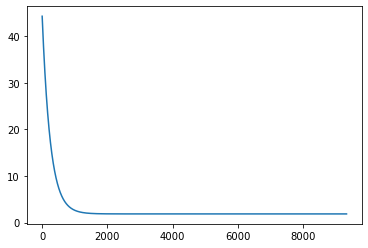

In [10]:
# 6. Execute GD and plot Cost
m, n = np.shape(x)
initw = np.zeros((1, n))

w, iterations, J = GD(x, y, initw, 0.00001, 0.00001, 10000)
original_w = w.copy()
print(w, iterations)

yt = np.dot(x, w.T)

plt.plot(J)

In [11]:
# 7. Make predictions
yt = np.dot(X_test, w.T)
costo = mse(y_test, yt)
original_cost = costo.copy()

print(np.shape(y_train), np.shape(yt))
print(costo)

(67, 1) (33, 1)
[[1.92843886]]


[[0.53314489]]


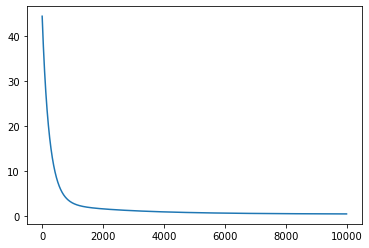

In [12]:
# 8. Add Polynomials

# Read CSV
x, y = load_csv('./Datasets/01 - trainingdata.csv')

# Add polynomials
x = np.concatenate((x, x*x, x**3), axis = 1)
x = np.array(x)

# Normalize
X_norm = normalize(x)

# Add ones
x = add_ones(X_norm)

m, n = np.shape(x)

# Initialize w
initw = np.zeros((1, n))

# GD
w, iterations, J = GD(x, y, initw, 0.00001, 0.00001, 10000)

# Cost
yt = np.dot(x, w.T)
costo = mse(y, yt)

print(costo)

# Graph
plt.plot(J)

In [13]:
# 9. Conclusions

# Comparison between costs
def r2(Y, Yt):
    error = Y - Yt
    varianza = (Y - np.average(Y)) ** 2
    cost = 1 - (np.sum(error ** 2)) / np.sum(varianza)
    
    return cost

print(f'Cost with MSE: {original_cost[0][0]}')
print(f'Cost with MSE (polynomial): {costo[0][0]}')

yt = np.dot(original_w, X_test.T).T

print(f'Cost with R2: {r2(y_test, yt)}')

Cost with MSE: 1.9284388584247587
Cost with MSE (polynomial): 0.5331448879274633
Cost with R2: 0.6570822187530067


Given the computed costs, it can be observed that adding more polynomials (capped at $x^3$ for this case) will result in better costs, meaning lower values.
With R2, considering that resides between \[0, 1\] being 1 a perfect score, it can be concluded that this model it's not bad at all, but it can definetely be improve with some tweaks, like iteration or fine grained algorithms.